

__Data Extraction__

-  Extract data to loan.csv
-  Get the total number of coloumns and Rows of Data
-  Get the Number of missing Rows and coloumns

In [1]:
#ohm shree vinayaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
loan_df=pd.read_csv('loan.csv',encoding='ISO-8859-1',low_memory =False)
loan_df.head(10)
print(loan_df.shape)
loan_df.isnull().sum()

(39717, 111)


id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


## __Data Cleaning__

-  Drop all the coloumns whose entire data is Null
-  Drop all the coloumns which has a single unique value 
-  There are many missing values in desc,emp title This is of no significance,hence dropping
-  There are lot of missing values  in next payment Date which is of less significance and hence dropping
-  Considring only ID coloumn and dropping member ID which does not have much signifiance
-  Considring only Sub Grade  coloumn and dropping Grade Coloumn
-  Dropping issue_d,last_pymnt_d,last_credit_pull_d  since dropping these coloumns
-  addr_state is not considerd for analysis and hence dropping this coloumn as well
- Dropping _inv coloumns since we are more intrested in total fund rather then in investor fund amount
- Dropping total_rec_prncp and 'total_rec_int coloumns since 
  total_pymnt=total_rec_prncp+total_rec_int+recoveries
  Hence keeping only total_pymnt coloumn
-  Number of coloumns reduced from 111 to 29

In [2]:
loan_df=loan_df.dropna(axis=1,how='all')
loan_df=loan_df.drop(loan_df.columns[loan_df.apply(lambda col: col.nunique()<2)], axis=1)
loan_df = loan_df.drop('emp_title', axis=1)
loan_df = loan_df.drop('desc', axis=1)
loan_df=loan_df.drop('url',axis=1)
loan_df=loan_df.drop('zip_code',axis=1)
loan_df=loan_df.drop('next_pymnt_d',axis=1)
loan_df=loan_df.drop('member_id',axis=1)
loan_df=loan_df.drop('grade',axis=1)
loan_df=loan_df.drop('issue_d',axis=1)
loan_df=loan_df.drop('last_pymnt_d',axis=1)
loan_df=loan_df.drop('last_credit_pull_d',axis=1)
loan_df=loan_df.drop('title',axis=1)
loan_df=loan_df.drop('purpose',axis=1)
loan_df=loan_df.drop('addr_state',axis=1)
loan_df=loan_df.drop('funded_amnt_inv',axis=1)
loan_df=loan_df.drop('out_prncp_inv',axis=1)
loan_df=loan_df.drop('total_pymnt_inv',axis=1)
loan_df=loan_df.drop('total_rec_prncp',axis=1)
loan_df=loan_df.drop('total_rec_int',axis=1)
loan_df=loan_df.drop('last_pymnt_amnt',axis=1)
print(loan_df.shape)

(39717, 29)


__Treating missing values of Data__
-  Lot of missing values in mths_since_last_delinq,mths_since_last_record coloumns,pub_rec_bankruptcies 
   keeping all these as NA's as is. The distrubtion will be affected if we fill 0 to these coloumns
   hence keeping these coloumns as NA as is
-  Filling 0 to missing values of emp length   

In [3]:
loan_df['emp_length'].fillna(0,inplace=True)   
loan_df.isnull().sum()   

id                             0
loan_amnt                      0
funded_amnt                    0
term                           0
int_rate                       0
installment                    0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
total_pymnt                    0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
pub_rec_bankruptcies         697
dtype: int64

__Checking for missing Data in Rows__

-  There are no missing values  for rows greater then 3,
   hence no much missing data in Row

In [4]:
loan_df.isnull().all(axis=1).sum()
len(loan_df[loan_df.isnull().sum(axis=1) > 3].index)

0

__Data correction__

-  Emp_length has 10+ for more then 10 years and < 1 for less then 1 years
-  Assuming 10+ as 10 years and < 1 as 0 years
-  Extracting only number of years and dropping 'years' string
-  Dropping months from term
-  Dropping % from int_rate and converting the data to float

In [5]:
loan_df['emp_length'] = loan_df['emp_length'].replace(np.nan, 0, regex=True)
loan_df.loc[loan_df['emp_length']=='10+']=10
loan_df.loc[loan_df['emp_length']=='< 1']=0
loan_df['emp_length']=loan_df.emp_length.str.extract('(\d+)', expand=True).astype(float)
loan_df['term']=loan_df.term.str.extract('(\d+)', expand=True).astype(float)
loan_df["int_rate"]=(loan_df["int_rate"].str.rstrip("%")).astype(float)
loan_df['revol_util']=(loan_df["revol_util"].str.rstrip("%")).astype(float)
loan_df.head(20)

,id,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies
0,1077501,5000,5000,36.0,10.65,162.87,B2,10.0,RENT,24000.00,...,0,13648,83.70,9,0.00,5863.155187,0.00,0.00,0.0000,0.0
1,1077430,2500,2500,60.0,15.27,59.83,C4,1.0,RENT,30000.00,...,0,1687,9.40,4,0.00,1008.710000,0.00,117.08,1.1100,0.0
2,1077175,2400,2400,36.0,15.96,84.33,C5,10.0,RENT,12252.00,...,0,2956,98.50,10,0.00,3005.666844,0.00,0.00,0.0000,0.0
3,1076863,10000,10000,36.0,13.49,339.31,C1,10.0,RENT,49200.00,...,0,5598,21.00,37,0.00,12231.890000,16.97,0.00,0.0000,0.0
4,1075358,3000,3000,60.0,12.69,67.79,B5,1.0,RENT,80000.00,...,0,27783,53.90,38,524.06,3513.330000,0.00,0.00,0.0000,0.0
5,1075269,5000,5000,36.0,7.90,156.46,A4,3.0,RENT,36000.00,...,0,7963,28.30,12,0.00,5632.210000,0.00,0.00,0.0000,0.0
6,1069639,7000,7000,60.0,15.96,170.08,C5,8.0,RENT,47004.00,...,0,17726,85.60,11,0.00,10110.840000,0.00,0.00,0.0000,0.0
7,1072053,3000,3000,36.0,18.64,109.43,E1,9.0,RENT,48000.00,...,0,8221,87.50,4,0.00,3939.135294,0.00,0.00,0.0000,0.0
8,1071795,5600,5600,60.0,21.28,152.39,F2,4.0,OWN,40000.00,...,0,5210,32.60,13,0.00,646.020000,0.00,189.06,2.0900,0.0
9,1071570,5375,5375,60.0,12.69,121.45,B5,1.0,RENT,15000.00,...,0,9279,36.50,3,0.00,1476.190000,0.00,269.29,2.5200,0.0


__Data Correction__

-  Convert the Date string to Date Format of earliest_cr_line  variable

In [6]:
loan_df['earliest_cr_line']='01-'+loan_df['earliest_cr_line'].astype(str)
loan_df['earliest_cr_line']=[dt.strptime(x, '%d-%b-%y').strftime('%d/%m/%Y') for x in loan_df['earliest_cr_line']]
loan_df['earliest_cr_line']=[dt.strptime(x,'%d/%m/%Y') for x in loan_df['earliest_cr_line']]


__Dropping Duplicates__

-  There are no duplicate data present

In [7]:
loan_df = loan_df.drop_duplicates()
print(loan_df.shape)

(39717, 29)


__Treating Outliers__
- annual_inc spread is huge,
- Very few data distrubution after  200,000, hence dropping the data after 200,000

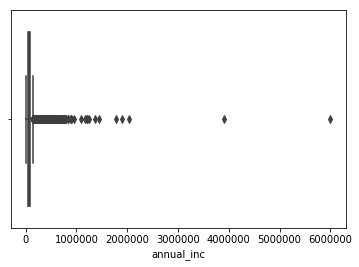

In [8]:
sns.boxplot(loan_df['annual_inc'])
plt.show()

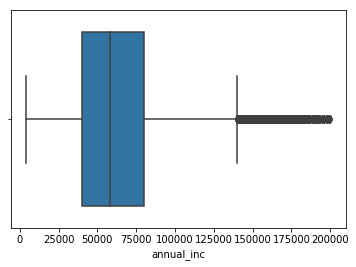

In [9]:
loan_df=loan_df.loc[loan_df['annual_inc']<200000]
sns.boxplot(loan_df['annual_inc'])
plt.show()

__Treating Outliers__

- Box plot of  total_pymnt represents outlayers till 60000
- Removing  the outlayers after 55000

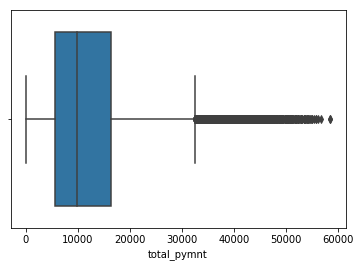

In [10]:
sns.boxplot(loan_df['total_pymnt'])
plt.show()

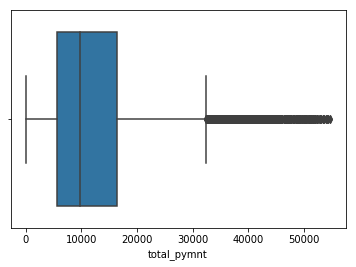

In [11]:
loan_df['total_pymnt']=loan_df['total_pymnt'].astype(np.float)
loan_df=loan_df.loc[loan_df['total_pymnt']<55000]
sns.boxplot(loan_df['total_pymnt'])
plt.show()

 __Treating Outliers__

- As per distplot installment data is distrubuted till 1400
- Not many outlayers, so keeping the data as is

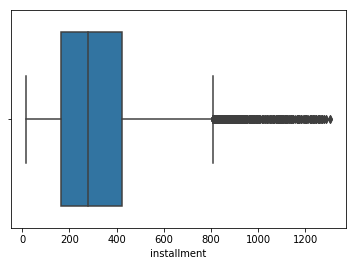

In [12]:
loan_df['installment'].describe()
sns.boxplot(loan_df['installment'])
plt.show()

__Treating Outliers__
- int_rate is valid till 26,not many out layers

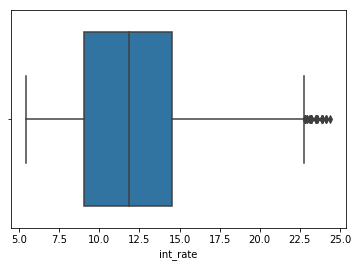

In [13]:
loan_df['int_rate'].describe()
sns.boxplot(loan_df['int_rate'])
plt.show()

__Treating Outliers__
- revol_bal  spread is huge,taking data till 140,000

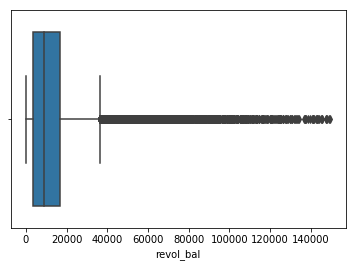

In [14]:
loan_df['revol_bal'].describe([0.55,0.60,0.65,0.70,0.75,0.80,0.90,0.95,0.98,0.99])
sns.boxplot(loan_df['revol_bal'])
plt.show()

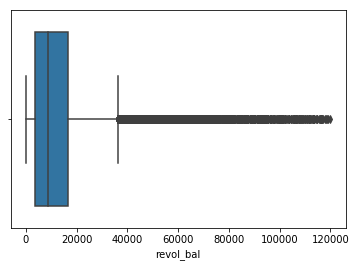

In [15]:
loan_df=loan_df.loc[loan_df['revol_bal']<120000]
sns.boxplot(loan_df['revol_bal'])
plt.show()

__Treating Outliers__

-  Most of data is missing or 0 for delinq_2yrs,inq_last_6mths,mths_since_last_record,'pub_rec
   
-  but these are important for analysis, not dropping the the existing data 


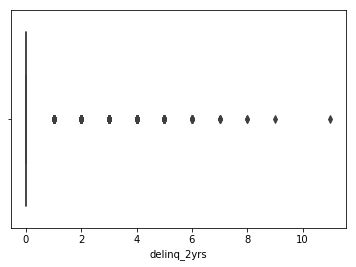

In [16]:
loan_df['delinq_2yrs'].describe()
sns.boxplot(loan_df['delinq_2yrs'])
plt.show()

__Treating Outlayers__

-  loan amount,funded_amnt,loan_amnt spread is till 35000
-  there is enough data also there in 35000 range, so keeping the data as is
- there is outlayers for dti, hence keeping as is


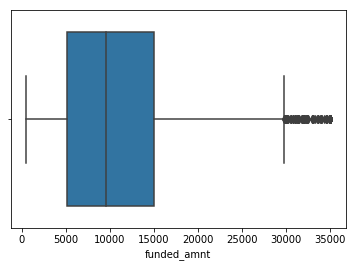

In [17]:
sns.boxplot(loan_df['funded_amnt'])
plt.show()

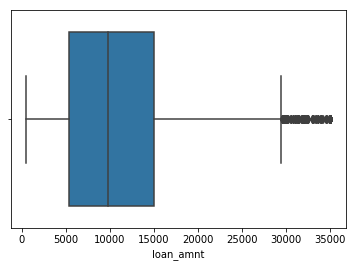

In [18]:
sns.boxplot(loan_df['loan_amnt'])
plt.show()

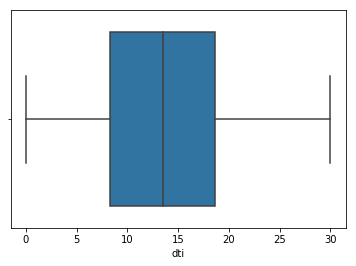

In [19]:
sns.boxplot(loan_df['dti'])
plt.show()

__Treating Outlayers__

-  There are few out layers after 80 in total_acc, dropping those


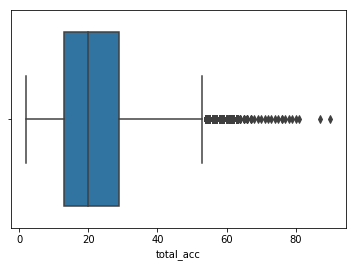

In [20]:
sns.boxplot(loan_df['total_acc'])
plt.show()

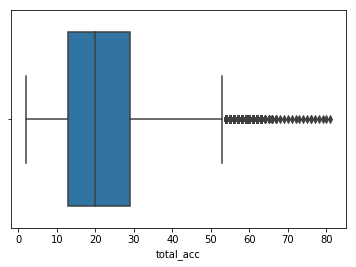

In [21]:
loan_df=loan_df.loc[loan_df['total_acc']<85]
sns.boxplot(loan_df['total_acc'])
plt.show()

__Segmented Univarient Analysis__
-  Sub Grade A1 to G5 is interpreted from 0 to 34.
-  With the graph we could see intrest rate is increasing from A1 to G5.
-  A1: Higher grade, G5:Lower grade
- Higher the Grade Better the Intrest Rate
- Lower the Grade, more the installment amount

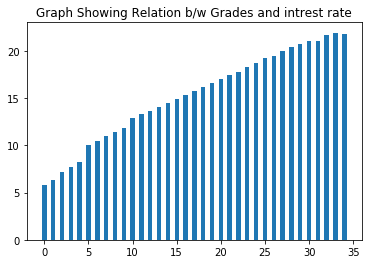

In [22]:
loan_df["int_rate"]=pd.to_numeric(loan_df["int_rate"])
int_rate_grp=loan_df.groupby('sub_grade')
int_rate_dict=int_rate_grp['int_rate'].mean().to_dict()
names = list(int_rate_dict.keys())
values = list(int_rate_dict.values())
plt.bar(range(len(int_rate_dict)),values,width=0.5)
plt.title("Graph Showing Relation b/w Grades and intrest rate")
plt.show()


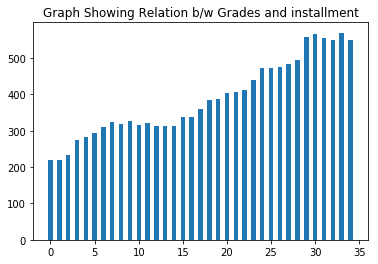

In [23]:
inst_rate_dict=int_rate_grp['installment'].mean().to_dict()
names = list(inst_rate_dict.keys())
values = list(inst_rate_dict.values())
plt.bar(range(len(inst_rate_dict)),values,width=0.5)
plt.title("Graph Showing Relation b/w Grades and installment")
plt.show()


__Segmented Univarient Analysis__

-  As per below analysis Not verfied documents have more public Record
-  Not verfied documents have more delinq records 
- Charge off status have public record

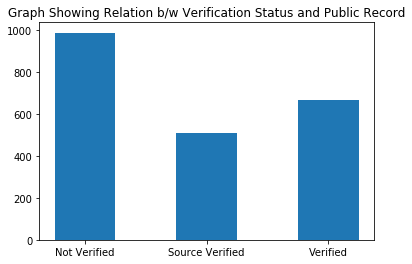

In [24]:
ver_rate_grp=loan_df.groupby('verification_status')
pub_rec_dict=ver_rate_grp['pub_rec'].sum().to_dict()
names = list(pub_rec_dict.keys())
values = list(pub_rec_dict.values())
plt.bar(range(len(pub_rec_dict)),values,tick_label=names,width=0.5)
plt.title("Graph Showing Relation b/w Verification Status and Public Record")
plt.show()


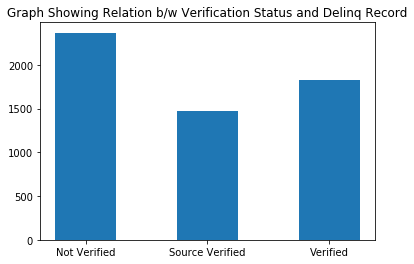

In [25]:
deliq_dict=ver_rate_grp['delinq_2yrs'].sum().to_dict()
names = list(deliq_dict.keys())
values = list(deliq_dict.values())
plt.bar(range(len(deliq_dict)),values,tick_label=names,width=0.5)
plt.title("Graph Showing Relation b/w Verification Status and Delinq Record")
plt.show()


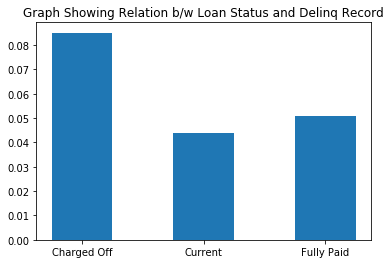

In [26]:
loan_rate_grp=loan_df.groupby('loan_status')
pubrec_dict=loan_rate_grp['pub_rec'].mean().to_dict()
names = list(pubrec_dict.keys())
values = list(pubrec_dict.values())
plt.bar(range(len(pubrec_dict)),values,tick_label=names,width=0.5)
plt.title("Graph Showing Relation b/w Loan Status and Delinq Record")
plt.show()



__Conclusion Drawn from segmented univarient analysis__

- Higher the grade, lower the intrest rate, better the benifit for borrower.
  higher grade borrower are more trust worthy
- More pub records,delinq records are observed in Not verified Verification Status
- More pub records,delinq records are observed in Charged off 
- Driving component variables  are **"sub_grade, verification_status,loan_status"**

__Bi Varient Analysis__

__Observation__
-  Loan_amnt,funded_amnt,installemnt, total pymnt are positivly highly co-related.
-  pub_rec, pub_rec_bankruptcies are highly co-related.
-  open_acc and total_acc is highly co-related, can be considered any one
-  dti and annual_inc is neagtivly co-related
-  pub_rec, pub_rec_bankruptcies,delinq_2yrs,inq_last_6mths,dti,coll_recv are negativly co-related to funded_amnt

__Conclusions drawn as per the co-relation matrix graph__
-  Higher the pub rec ,lesser the funded amount 
-  pub_rec, pub_rec_bankruptcies,delinq_2yrs,inq_last_6mths,dti,coll_recv are  co-related to intrest rate.
   Higher the pub rec ,higher the intrest rate
-  **dti,pub_rec, pub_rec_bankruptcies,delinq_2yrs,inq_last_6mths,dti,coll_recv are the important driving parameters    for FICO score**
   

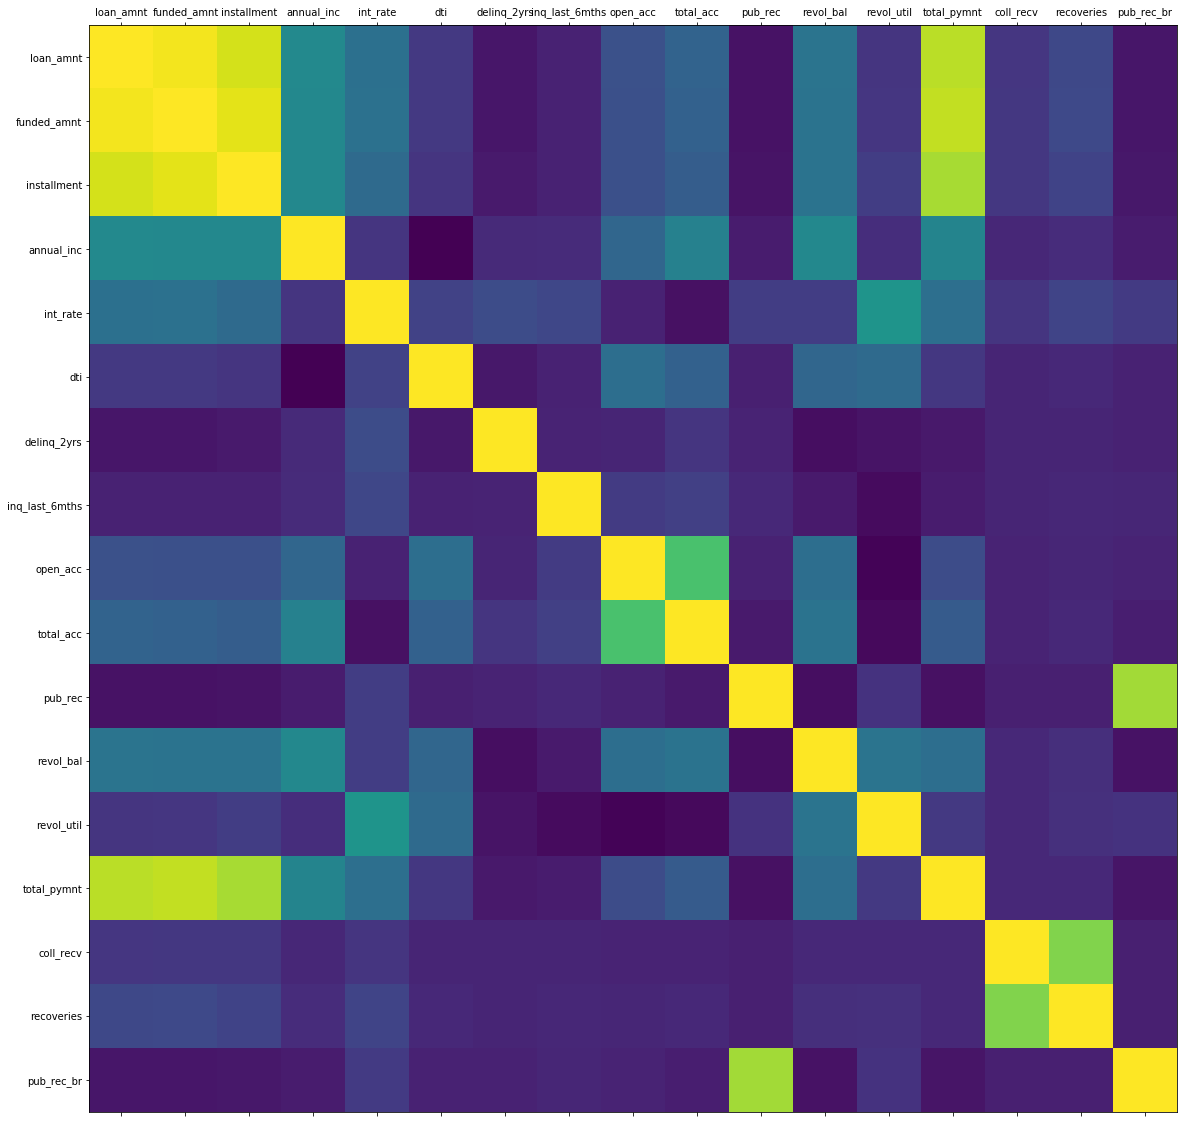

In [27]:
loan_df.rename(columns={'collection_recovery_fee':'coll_recv',
                          'pub_rec_bankruptcies':'pub_rec_br',
                          }, 
                 inplace=True)
filt_df = loan_df.filter(['loan_amnt','funded_amnt','installment','annual_inc','int_rate','dti','delinq_2yrs','inq_last_6mths','open_acc','total_acc','pub_rec','revol_bal','revol_util','total_pymnt','coll_recv','recoveries','pub_rec_br'], axis=1)
corr = filt_df.corr()
size=20
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

__Data Driven Derived Metrices__

- total_bal column is created to get the remaining credit card balance
- total_credit_card_limit represents the total credit limit amount for particular member
- delinq_history_rec is consolidated variable of all delinq related varibles,multilple inquires,total_rec_late_fee
- more multilple inquires will also have larger  impact hence providing 0.3 weight. 
- total_rec_late_fee also provides the black mark on the credit payment history. 
- converting total_rec_late_fee,coll_rec, to no_of_late_fee record, Considring fee of 5 as 1 record, hence dividing by 5
-


In [28]:
loan_df["total_bal"]=round((loan_df['term']*loan_df['installment'])-loan_df['total_pymnt'],0)
loan_df["total_credit_card_limit"]=round((loan_df['revol_bal']*loan_df['revol_util'])/100,0)
loan_df['delinq_history_rec']=round(loan_df['pub_rec_br']+loan_df['delinq_2yrs']+
                                     (0.5*loan_df['inq_last_6mths'])+
                                     ((loan_df['total_rec_late_fee'])/5)+(loan_df['coll_recv']/5)+loan_df['recoveries']/10)
loan_df=loan_df.loc[loan_df['total_credit_card_limit']>0]
loan_df['credit_card_utilization']=loan_df["total_bal"]/loan_df["total_credit_card_limit"]
loan_df.head(50)



C:\Users\dkiran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,id,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,out_prncp,total_pymnt,total_rec_late_fee,recoveries,coll_recv,pub_rec_br,total_bal,total_credit_card_limit,delinq_history_rec,credit_card_utilization
0,1077501,5000,5000,36.0,10.65,162.87,B2,10.0,RENT,24000.00,...,0.00,5863.155187,0.00,0.00,0.0000,0.0,0.0,11423.0,0.0,0.000000
1,1077430,2500,2500,60.0,15.27,59.83,C4,1.0,RENT,30000.00,...,0.00,1008.710000,0.00,117.08,1.1100,0.0,2581.0,159.0,14.0,16.232704
2,1077175,2400,2400,36.0,15.96,84.33,C5,10.0,RENT,12252.00,...,0.00,3005.666844,0.00,0.00,0.0000,0.0,30.0,2912.0,1.0,0.010302
3,1076863,10000,10000,36.0,13.49,339.31,C1,10.0,RENT,49200.00,...,0.00,12231.890000,16.97,0.00,0.0000,0.0,-17.0,1176.0,4.0,-0.014456
4,1075358,3000,3000,60.0,12.69,67.79,B5,1.0,RENT,80000.00,...,524.06,3513.330000,0.00,0.00,0.0000,0.0,554.0,14975.0,0.0,0.036995
5,1075269,5000,5000,36.0,7.90,156.46,A4,3.0,RENT,36000.00,...,0.00,5632.210000,0.00,0.00,0.0000,0.0,0.0,2254.0,2.0,0.000000
6,1069639,7000,7000,60.0,15.96,170.08,C5,8.0,RENT,47004.00,...,0.00,10110.840000,0.00,0.00,0.0000,0.0,94.0,15173.0,0.0,0.006195
7,1072053,3000,3000,36.0,18.64,109.43,E1,9.0,RENT,48000.00,...,0.00,3939.135294,0.00,0.00,0.0000,0.0,0.0,7193.0,1.0,0.000000
8,1071795,5600,5600,60.0,21.28,152.39,F2,4.0,OWN,40000.00,...,0.00,646.020000,0.00,189.06,2.0900,0.0,8497.0,1698.0,20.0,5.004122
9,1071570,5375,5375,60.0,12.69,121.45,B5,1.0,RENT,15000.00,...,0.00,1476.190000,0.00,269.29,2.5200,0.0,5811.0,3387.0,27.0,1.715678


__Type Driven Derived Matrics__

-  The longer the credit history and the older  accounts the better.    
-  Creating the no of years derived coloumn from earliest_cr_line varaible to know the age


In [29]:
import datetime as dt
loan_df['earliest_cr_line']=pd.to_datetime(pd.to_datetime(loan_df['earliest_cr_line'],errors='coerce').
                                             fillna('2018-01-01'),format='%Y-%m-%d')
loan_df['credit_history']=dt.date.today().year-pd.DatetimeIndex(loan_df['earliest_cr_line']).year
loan_df.head(20)

C:\Users\dkiran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dkiran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,total_pymnt,total_rec_late_fee,recoveries,coll_recv,pub_rec_br,total_bal,total_credit_card_limit,delinq_history_rec,credit_card_utilization,credit_history
0,1077501,5000,5000,36.0,10.65,162.87,B2,10.0,RENT,24000.00,...,5863.155187,0.00,0.00,0.0000,0.0,0.0,11423.0,0.0,0.000000,33
1,1077430,2500,2500,60.0,15.27,59.83,C4,1.0,RENT,30000.00,...,1008.710000,0.00,117.08,1.1100,0.0,2581.0,159.0,14.0,16.232704,19
2,1077175,2400,2400,36.0,15.96,84.33,C5,10.0,RENT,12252.00,...,3005.666844,0.00,0.00,0.0000,0.0,30.0,2912.0,1.0,0.010302,17
3,1076863,10000,10000,36.0,13.49,339.31,C1,10.0,RENT,49200.00,...,12231.890000,16.97,0.00,0.0000,0.0,-17.0,1176.0,4.0,-0.014456,22
4,1075358,3000,3000,60.0,12.69,67.79,B5,1.0,RENT,80000.00,...,3513.330000,0.00,0.00,0.0000,0.0,554.0,14975.0,0.0,0.036995,22
5,1075269,5000,5000,36.0,7.90,156.46,A4,3.0,RENT,36000.00,...,5632.210000,0.00,0.00,0.0000,0.0,0.0,2254.0,2.0,0.000000,14
6,1069639,7000,7000,60.0,15.96,170.08,C5,8.0,RENT,47004.00,...,10110.840000,0.00,0.00,0.0000,0.0,94.0,15173.0,0.0,0.006195,13
7,1072053,3000,3000,36.0,18.64,109.43,E1,9.0,RENT,48000.00,...,3939.135294,0.00,0.00,0.0000,0.0,0.0,7193.0,1.0,0.000000,11
8,1071795,5600,5600,60.0,21.28,152.39,F2,4.0,OWN,40000.00,...,646.020000,0.00,189.06,2.0900,0.0,8497.0,1698.0,20.0,5.004122,14
9,1071570,5375,5375,60.0,12.69,121.45,B5,1.0,RENT,15000.00,...,1476.190000,0.00,269.29,2.5200,0.0,5811.0,3387.0,27.0,1.715678,14


__Buisness Driven Data Matrices __


__Formula to calculate Derived Credit score __

-  On Time payment percentage, pub records,mupltiple inquires,public_bankrupcy,dilinq record  is  a factor that        often weighs heavily into   creditworthiness which will highly impact the score, so choosing high negative        weight for Credit score calculation. weight=-10

   Driving Variable:**"delinq_history_rec"**
   
-  The longer  credit history  older the accounts, better the credit card worthiness . That is why it can be a good idea to keep older credit cards open and active.So choosing positive weight for it.weight=+1
   
   Driving Variable:**"credit_history"**
   
-  Credit card Utilization  calculated by taking total credit card balances and dividing that number by  total credit card limits. It essentially shows creditors how much the creditors use on average. A good rule of thumb is that lower credit card utilization rates are better,hence giving negative weight for it weight=-1

   Driving Variable:**"credit_card_utilization"**
   

- DTI is ratio of total debitable income w.r.t the anual income, Lesser the DTI ratio, better the borrower's financial condition and better creditworthiness.So choosing postive weight for it weight=-3

   Driving Variable:**"DTI"**
   
- Consumers with more accounts (or more lines of credit) often have higher credit scores because it indicates that more lenders are willing to give them credit. Having a good mix of different types of credit is good for overall credit health as well,but too many accounts is also dangerious. So giving less positve weight for it

- Driving Variable:**"total_acc"**
- With all above items we have come with the derived_credit_score coloumn which specifies weight of the borrower.     Higher the weight, better the trust worthiness. An assumtion is made that for the borrower with weight higher     then 750 can be offerd with less intrest rate.weight=+0.1
  Credit score above 750 can be offered with higher intrest rate

  Credit score 650 to 750 can be offered with medium intrest rate
  
  Credit score n500 - 600 can be offerd with more intrest rate
  
  below 500 can be rejected.


In [30]:
loan_df['derived_credit_score']=800-((10*loan_df['delinq_history_rec'])-(3*loan_df['dti'])
                                     +loan_df['credit_history']-loan_df['credit_card_utilization']+0.1*loan_df['total_acc'])
loan_df.to_csv('filtered_loan_der.csv')
loan_df.head(20)

C:\Users\dkiran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,coll_recv,pub_rec_br,total_bal,total_credit_card_limit,delinq_history_rec,credit_card_utilization,credit_history,derived_credit_score
0,1077501,5000,5000,36.0,10.65,162.87,B2,10.0,RENT,24000.00,...,0.00,0.00,0.0000,0.0,0.0,11423.0,0.0,0.000000,33,849.050000
1,1077430,2500,2500,60.0,15.27,59.83,C4,1.0,RENT,30000.00,...,0.00,117.08,1.1100,0.0,2581.0,159.0,14.0,16.232704,19,659.832704
2,1077175,2400,2400,36.0,15.96,84.33,C5,10.0,RENT,12252.00,...,0.00,0.00,0.0000,0.0,30.0,2912.0,1.0,0.010302,17,798.170302
3,1076863,10000,10000,36.0,13.49,339.31,C1,10.0,RENT,49200.00,...,16.97,0.00,0.0000,0.0,-17.0,1176.0,4.0,-0.014456,22,794.285544
4,1075358,3000,3000,60.0,12.69,67.79,B5,1.0,RENT,80000.00,...,0.00,0.00,0.0000,0.0,554.0,14975.0,0.0,0.036995,22,828.056995
5,1075269,5000,5000,36.0,7.90,156.46,A4,3.0,RENT,36000.00,...,0.00,0.00,0.0000,0.0,0.0,2254.0,2.0,0.000000,14,798.400000
6,1069639,7000,7000,60.0,15.96,170.08,C5,8.0,RENT,47004.00,...,0.00,0.00,0.0000,0.0,94.0,15173.0,0.0,0.006195,13,856.436195
7,1072053,3000,3000,36.0,18.64,109.43,E1,9.0,RENT,48000.00,...,0.00,0.00,0.0000,0.0,0.0,7193.0,1.0,0.000000,11,794.650000
8,1071795,5600,5600,60.0,21.28,152.39,F2,4.0,OWN,40000.00,...,0.00,189.06,2.0900,0.0,8497.0,1698.0,20.0,5.004122,14,606.354122
9,1071570,5375,5375,60.0,12.69,121.45,B5,1.0,RENT,15000.00,...,0.00,269.29,2.5200,0.0,5811.0,3387.0,27.0,1.715678,14,571.655678
